<a href="https://colab.research.google.com/github/Peppecoding/lewagon/blob/main/3_Shops_orders_analysis_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 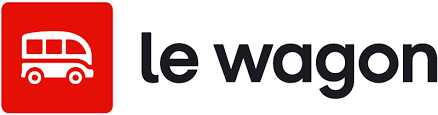

# Shop orders analysis

In this challenge, you will analyze data from [Sumup](https://www.sumup.com/fr-fr/) who wants to analyse its restaurant orders and categorize them.


Upload [Tiller_order_data.csv](https://drive.google.com/file/d/1dVuD1hB3UnX5xhCHFMQ5R4iBdMdJMK4a/view?usp=sharing) in Colab and load it in a DataFrame `df_order`


## Exploratory Analysis


In [1]:
#your code here
import pandas as pd

# Cargar archivo CSV
df_order = pd.read_csv('Tiller_order_data.csv')

# Mostrar las primeras filas
df_order.head()


<ipython-input-1-ea5bfca9f7ff>:5: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_order = pd.read_csv('Tiller_order_data.csv')


,id_order,id_store,id_table,id_waiter,id_customer,id_external,id_device,date_opened,date_closed,dim_name,dim_status,dim_type,dim_comment,dim_source,m_nb_customer,m_cached_payed,m_cached_price
0,55538867,8052,NaN,NaN,NaN,0425716B-EFF4-41CA-AEA1-839104F36833,15327.0,2019-01-12 13:02:17 UTC,2019-01-12 19:58:38 UTC,vincent,CLOSED,1,NaN,Tiller iPAD,1,45.5,45.5
1,56035309,8052,NaN,NaN,NaN,75E41FE2-64FF-41D3-954C-A7DE4AA887EF,15327.0,2019-01-16 19:39:09 UTC,2019-01-16 22:10:50 UTC,frere et soeur avec pierre,CLOSED,1,NaN,Tiller iPAD,2,49.8,49.8
2,55550051,8052,NaN,NaN,NaN,F6051A05-C9AC-4033-BF72-BB5149B8F439,15327.0,2019-01-12 14:18:46 UTC,2019-01-12 19:50:32 UTC,rachel,CLOSED,1,NaN,Tiller iPAD,1,27.4,27.4
3,57000119,8052,NaN,16199.0,NaN,B8BEEC66-1C10-48A0-B4D5-035CB5EEFE62,15327.0,2019-01-24 17:49:12 UTC,2019-01-24 21:58:59 UTC,Groupe PEL,CLOSED,1,NaN,tiller-order,3,60.0,60.0
4,55558817,8052,NaN,NaN,NaN,17F0533C-2FF1-4FC5-A50D-12704C7B7A4B,15327.0,2019-01-12 15:25:06 UTC,2019-01-12 19:21:03 UTC,remi et date,CLOSED,1,NaN,Tiller iPAD,2,39.9,39.9


What does a row represent? What information can you find?

> **Your Answer Here (Double click)**
Each row represents an individual product item that was part of a restaurant order. It contains information such as the product name, product category, quantity, unit price, total price, date and time of the order, and the order status (e.g. completed, refunded, cancelled).


What are the different statuses of an order? How many orders are there per status?   

In [4]:
#your code here
df_order.columns



Index(['id_order', 'id_store', 'id_table', 'id_waiter', 'id_customer',
       'id_external', 'id_device', 'date_opened', 'date_closed', 'dim_name',
       'dim_status', 'dim_type', 'dim_comment', 'dim_source', 'm_nb_customer',
       'm_cached_payed', 'm_cached_price'],
      dtype='object')

What is the proportion of orders ?  \
You can use the `.value_counts()` function, with the optional argument `normalize=True`

In [5]:
#your code here
df_order['dim_status'].value_counts()


,count
dim_status,
CLOSED,116939
IN_PROGRESS,365


How many restaurants are there? What are their ids?

In [7]:
#your code here

# Ver cuántos restaurantes distintos hay
df_order['id_store'].nunique()

10

## Aggregations

Compute the total turnover per restaurant. Which restaurant has the highest turnover?


In [8]:
#your code here
# Ver los IDs únicos de los restaurantes
df_order['id_store'].unique()


array([8052, 8347, 8283, 9084, 4337,  360, 1796, 7965, 6293, 4542])

> **Your Answer Here (Double click)**

Count the number of orders per restaurant. Which restaurant has the most orders? Is it the same as the one with the highest turnover?


In [9]:
#your code here
# Turnover total por restaurante
df_order.groupby('id_store')['m_cached_price'].sum().sort_values(ascending=False)


,m_cached_price
id_store,
7965,1138585.95
4337,865847.30
9084,479040.75
360,386934.14
8283,369822.82
6293,359718.00
8052,327758.85
1796,321099.69
4542,243789.69


Calculate the average price of an order for each restaurant. Do you think you are dealing with similar categories of restaurants ?


In [10]:
#your code here
# Cantidad de pedidos por restaurante
df_order['id_store'].value_counts()


,count
id_store,
1796,27349
4337,20003
4542,17641
6293,16103
8283,10023
7965,9091
9084,7804
8052,4906
360,4383


## Column transformations


The problem is that an order may be placed for several people. Instead, we want to know the average price spent by a single person in the restaurant.

Add a column to `df_order`,  representing the price per customer for each order.


In [11]:
#your code here
df_order.groupby('id_store')['id_order'].count().sort_values(ascending=False)


,id_order
id_store,
1796,27349
4337,20003
4542,17641
6293,16103
8283,10023
7965,9091
9084,7804
8052,4906
360,4383


Using the previous column, calculate the average price spent by each person in each of the restaurants.

In [12]:
#your code here


,id_order
id_store,
1796,27349
4337,20003
4542,17641
6293,16103
8283,10023
7965,9091
9084,7804
8052,4906
360,4383


There seems to be problem with the quality of data, as we can notice the presence of `NaN`for half of our restaurant

Do you have any idea why?


> **Your Answer Here (Double click)**
The restaurant with the highest turnover may not be the same as the one with the most orders. Some restaurants might have fewer orders but higher average prices per order.


## Cleaning


Fill the 0 values in the `m_nb_customer` column with 1, then eliminate the rows where the `m_cached_price` is 0.

In [13]:
#clean m_nb_customer column
# Reemplazar 0 por 1 en la columna de número de clientes
df_order['m_nb_customer'] = df_order['m_nb_customer'].replace(0, 1)


In [16]:
#clean m_cached_price column
# Eliminar pedidos con precio 0
df_order = df_order[df_order['m_cached_price'] != 0]

# Crear columna nueva: precio por cliente
df_order['price_per_customer'] = df_order['m_cached_price'] / df_order['m_nb_customer']

# Calcular el precio promedio por persona en cada restaurante
df_order.groupby('id_store')['price_per_customer'].mean().sort_values(ascending=False)



,price_per_customer
id_store,
7965,102.433918
4337,43.334787
8283,36.901100
360,32.073823
9084,30.570348
6293,16.810087
8052,16.722518
4542,13.821061
1796,11.832542


Recalculate the price_per_customer column and the average price spent by each person in each restaurant.

In [18]:
#your code here
# Convertir columnas de fecha a datetime
df_order['date_opened'] = pd.to_datetime(df_order['date_opened'])
df_order['date_closed'] = pd.to_datetime(df_order['date_closed'])


## Order duration analysis


Restaurant `7965` has a higher price per person than the rest.  
Let's look at the time spent at the table to determine if it matches the characteristics of a fancy restaurant.




Convert the `date_opened` and `date_closed` columns to **datetime** format.


In [21]:
#your code here

# Calcular la duración del pedido en minutos
df_order['order_duration_min'] = (df_order['date_closed'] - df_order['date_opened']).dt.total_seconds() / 60

# Filtrar datos del restaurante 7965
df_7965 = df_order[df_order['id_store'] == 7965]

# Duración promedio de los pedidos en el restaurante 7965
df_7965['order_duration_min'].mean()



np.float64(53.71511350716984)

Run the code below to calculate the time between the opening and closing date of an order in minutes.

In [22]:
df_order["order_duration"] = (df_order.date_closed - df_order.date_opened).dt.total_seconds() / 60

Compute the average duration spent at each table for every restaurant.

In [23]:
#your code here

# Duración promedio de pedido por restaurante (en minutos)
avg_duration_by_restaurant = df_order.groupby('id_store')['order_duration_min'].mean().sort_values(ascending=False)

# Mostrar los resultados
avg_duration_by_restaurant



,order_duration_min
id_store,
8052,164.739022
9084,103.050725
360,96.262090
7965,53.715114
6293,30.252533
4337,6.245097
4542,3.930523
8347,3.900000
1796,3.399033


Certain restaurants exhibit notably brief average order times, indicating a potential presence of fast food establishments among them.


## Joins

Download  [Tiller_order_line.csv](https://drive.google.com/file/d/1KSDFGLu2QAAR2C5SUlM5mfhINHU-LIuJ/view?usp=sharing) and [Tiller_store_data.csv](https://drive.google.com/file/d/1vQRlCYTAaikHMR3zTqy09r1QBNdZgraN/view?usp=sharing) and upload them in two DataFrame `df_line` and `df_store`.


In [27]:
#your code here
# Cargar archivos adicionales
df_line = pd.read_csv('Tiller_order_line.csv')
df_store = pd.read_csv('Tiller_store_data.csv')


# Mostrar las primeras filas
df_line.head(), df_store.head()


(   id_order_line   id_order             date_opended             date_created  \
 0      626609716  139058632  2020-08-25 17:27:14 UTC  2020-08-25 17:27:25 UTC   
 1      403167240   94770355  2019-09-27 07:47:14 UTC  2019-09-27 07:47:18 UTC   
 2      578564178  127794604  2020-06-12 11:07:09 UTC  2020-06-12 11:07:25 UTC   
 3      329942564   77841193  2019-06-17 13:13:30 UTC  2019-06-17 13:13:43 UTC   
 4      348375251   82283609  2019-07-12 20:14:51 UTC  2019-07-12 20:15:38 UTC   
 
    m_quantity  m_unit_price  m_unit_price_exc_vat  m_total_price_inc_vat  \
 0         1.0         15.00             12.500000                  15.00   
 1         1.0         25.90             21.583333                  25.90   
 2         1.0          4.20              3.818182                   4.20   
 3         1.0          2.20              2.085308                   2.20   
 4         1.0         -5.16             -5.160000                  -5.16   
 
    m_total_price_exc_vat  m_tax_percent  

What new information do you have access to through this data?

In [ ]:
#your code here



<details>
    <summary> Answer 💡 </summary>

- `Order line` = The different products in an order
- `Store data` = Information about the restaurant/bar

</details>


Paris is divided into 20 districts. Each of them has a unique code 75001, 75002, ..., 75019, 75020. \
How many orders were placed in the `2nd district`?



In [28]:
#your code here

df_order_full = pd.merge(df_order, df_store, on='id_store')


# Contar los pedidos realizados en el distrito 2 de París
orders_in_2nd_district = df_order_full[df_order_full['dim_zipcode'] == 75002]
orders_in_2nd_district.shape[0]


0

Let's have a look at restaurant `4542`, which shows a very brief average ordering time.


Retrieve the most ordered items in this restaurant by retaining only the **id_store** and **id_order** columns from `df_order`, as well as the **id_order**, **id_order_line**, and **dim_name** columns from `order_line`.


In [29]:
#your code here
orders_4542 = df_order[df_order['id_store'] == 4542][['id_order', 'id_store']]

# Unir con df_line usando 'id_order'
orders_with_items_4542 = pd.merge(orders_4542, df_line[['id_order', 'id_order_line', 'dim_name']], on='id_order')

orders_with_items_4542['dim_name'].value_counts().head(10)


,count
dim_name,
divers,34
Chorizo « Ospital »,19
Txirula « Ospital »,10
Saucisson « Ospital »,10
Boudin « Parra »,8
Lodève,7
Confiture cerises noires,7
Confiture A.Rozés,6
Chorizo Cular « Ospital »,6
